<a href="https://colab.research.google.com/github/SyedHarshath/Computer-Vision/blob/main/Linear_Filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

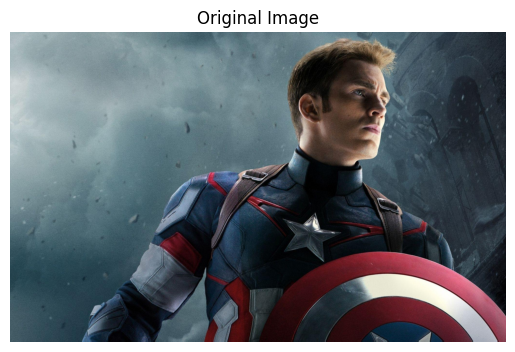

In [ ]:
image = cv2.imread("captain.jpg")
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

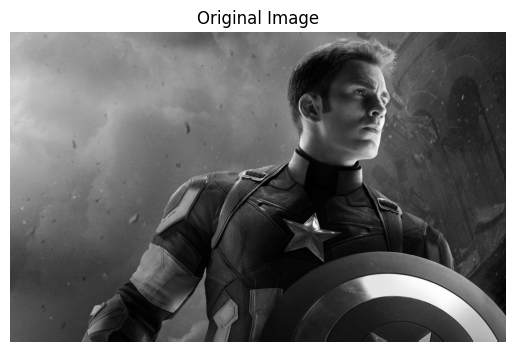

In [ ]:
image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.title("Original Image")
plt.imshow(image_gray,cmap='gray')
plt.axis('off')
plt.show()

### Image Filtering

In [ ]:
def apply_filter(image, filter_mask):
    if len(image.shape) == 3:
        image = np.mean(image, axis=2)
    image_height, image_width = image.shape
    filter_height, filter_width = filter_mask.shape
    pad_height, pad_width = filter_height // 2, filter_width // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
    filtered_image = np.zeros_like(image, dtype=float)
    for i in range(image_height):
        for j in range(image_width):
            region = padded_image[i:i + filter_height, j:j + filter_width]
            filtered_image[i, j] = np.sum(region * filter_mask)
    filtered_image = np.clip(filtered_image, 0, 255).astype(np.uint8)
    return filtered_image


In [ ]:
def median_filter(image, kernel_size=3):
    assert kernel_size % 2 == 1
    height, width = image.shape
    pad = kernel_size // 2
    padded_image = np.pad(image, pad, mode='constant', constant_values=0)
    filtered_image = np.zeros_like(image)
    for i in range(height):
        for j in range(width):
            neighborhood = padded_image[i:i+kernel_size, j:j+kernel_size]
            filtered_image[i, j] = np.median(neighborhood)
    return filtered_image

In [ ]:
mask_size = 25
box_blur_filter=np.ones((mask_size,mask_size),np.float32)/(mask_size*mask_size)
sharpening_filter = np.array([[ 0, -1,  0],
                              [-1,  5, -1],
                              [ 0, -1,  0]], dtype=np.float32)
sharpened_image = apply_filter(image_gray, sharpening_filter)
smoothed_image_box = apply_filter(image_gray, box_blur_filter)
smoothed_image_median = median_filter(image_gray, kernel_size=25)

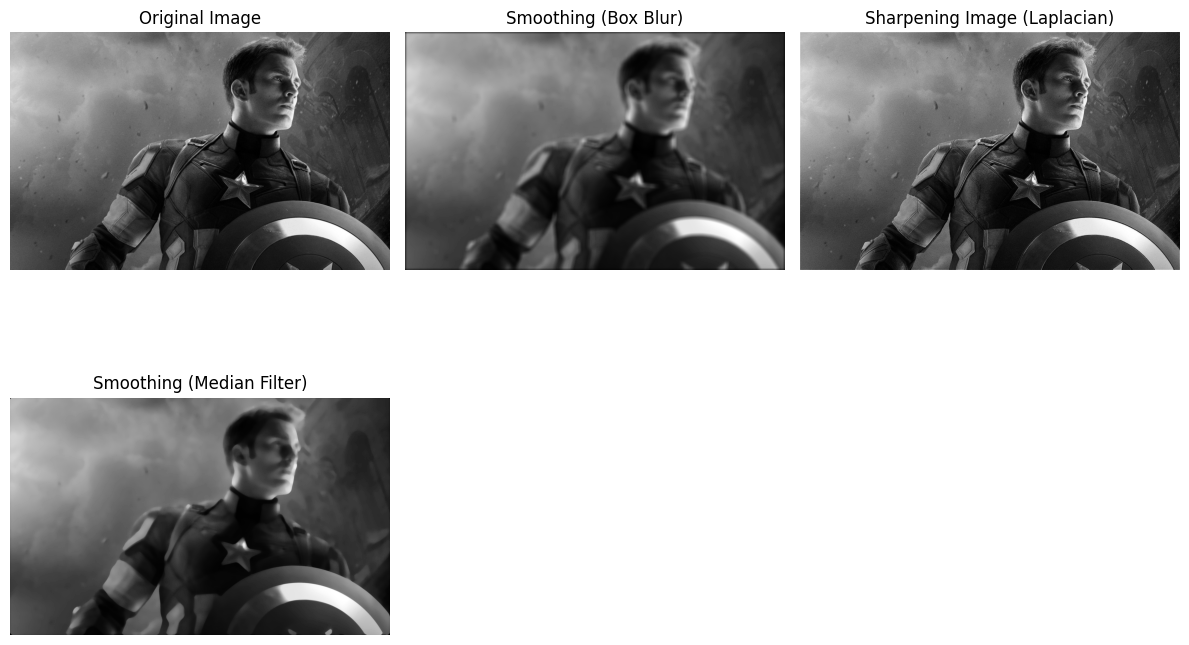

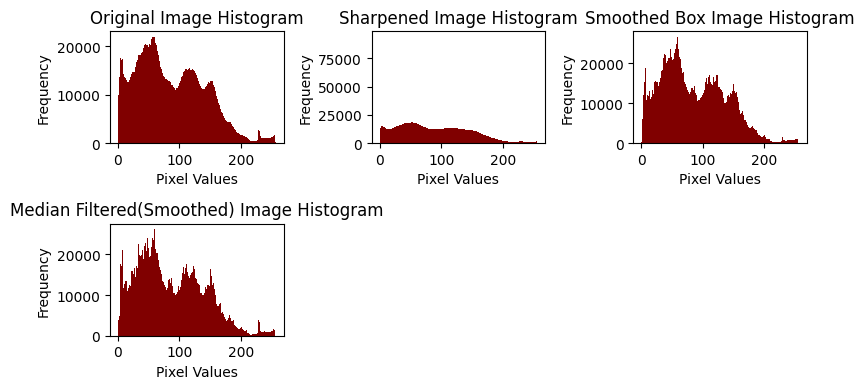

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(image_gray, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title("Smoothing (Box Blur)")
plt.imshow(smoothed_image_box,cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title("Sharpening Image (Laplacian)")
plt.imshow(sharpened_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title("Smoothing (Median Filter)")
plt.imshow(smoothed_image_median, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.subplot(2,3,1)
plt.hist(image_gray.ravel(),bins=256,range=(0,256),color='maroon')
plt.title("Original Image Histogram")
plt.xlabel("Pixel Values")
plt.ylabel("Frequency")

plt.subplot(2,3,2)
plt.hist(sharpened_image.ravel(),bins=256,range=(0,256),color='maroon')
plt.title("Sharpened Image Histogram")
plt.xlabel("Pixel Values")
plt.ylabel("Frequency")

plt.subplot(2,3,3)
plt.hist(smoothed_image_box.ravel(),bins=256,range=(0,256),color='maroon')
plt.title("Smoothed Box Image Histogram")
plt.xlabel("Pixel Values")
plt.ylabel("Frequency")

plt.subplot(2,3,4)
plt.hist(smoothed_image_median.ravel(),bins=256,range=(0,256),color='maroon')
plt.title("Median Filtered(Smoothed) Image Histogram")
plt.xlabel("Pixel Values")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### Discrete Fourier Transform

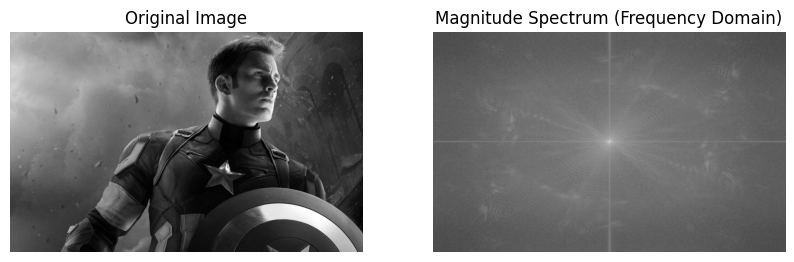

In [ ]:
dft = np.fft.fft2(image_gray)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(np.abs(dft_shift)+1)

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.imshow(image_gray,cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(magnitude_spectrum,cmap='gray')
plt.title("Magnitude Spectrum (Frequency Domain)")
plt.axis('off')
plt.show()

### Shifting Image

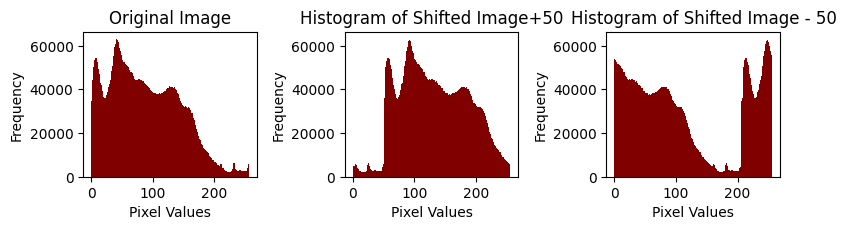

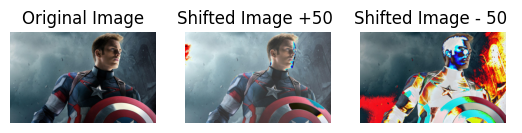

In [ ]:
shifted_image_add = np.clip(image_rgb + 50, 0, 255).astype(np.uint8)
shifted_image_sub = np.clip(image_rgb - 50, 0, 255).astype(np.uint8)

plt.figure(figsize=(8,4))
plt.subplot(2,3,1)
plt.hist(image_rgb.ravel(),bins=256,range=(0,256),color='maroon')
plt.xlabel("Pixel Values")
plt.ylabel("Frequency")
plt.title("Original Image")

plt.subplot(2,3,2)
plt.hist(shifted_image_add.ravel(),bins=256,range=(0,256),color='maroon')
plt.xlabel("Pixel Values")
plt.ylabel("Frequency")
plt.title("Histogram of Shifted Image+50")

plt.subplot(2,3,3)
plt.hist(shifted_image_sub.ravel(),bins=256,range=(0,256),color='maroon')
plt.xlabel("Pixel Values")
plt.ylabel("Frequency")
plt.title("    Histogram of Shifted Image - 50")
plt.tight_layout()
plt.show()

plt.subplot(2,3,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(shifted_image_add)
plt.title("Shifted Image +50 ")
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(shifted_image_sub)
plt.title("Shifted Image - 50 ")
plt.axis('off')
plt.show()

### Contrast Stretching

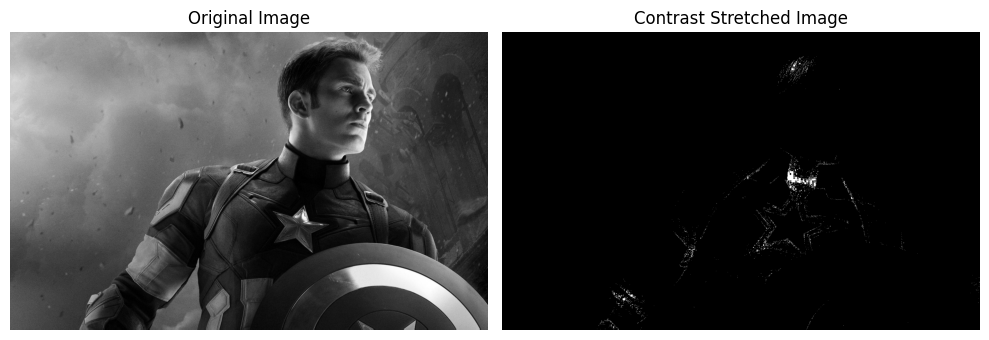

Text(0.5, 1.0, 'Histogram of Stretched Image')

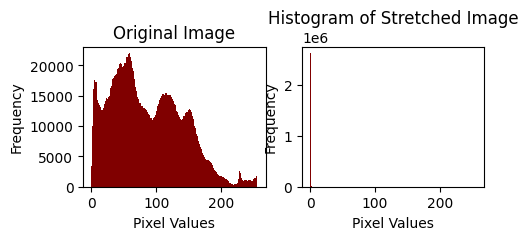

In [ ]:
I_min = np.min(image_gray)
I_max = np.max(image_gray)
stretched_image = np.clip(((image_gray - I_min) * 255) / (I_max - I_min), 0, 255).astype(np.uint8)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(image_gray,cmap='gray')
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Contrast Stretched Image")
plt.imshow(stretched_image,cmap='gray')
plt.axis("off")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
plt.subplot(2,3,1)
plt.hist(image_gray.ravel(),bins=256,range=(0,256),color='maroon')
plt.xlabel("Pixel Values")
plt.ylabel("Frequency")
plt.title("Original Image")

plt.subplot(2,3,2)
plt.hist(stretched_image.ravel(),bins=256,range=(0,256),color='maroon')
plt.xlabel("Pixel Values")
plt.ylabel("Frequency")
plt.title("Histogram of Stretched Image")

### Image Thresholding

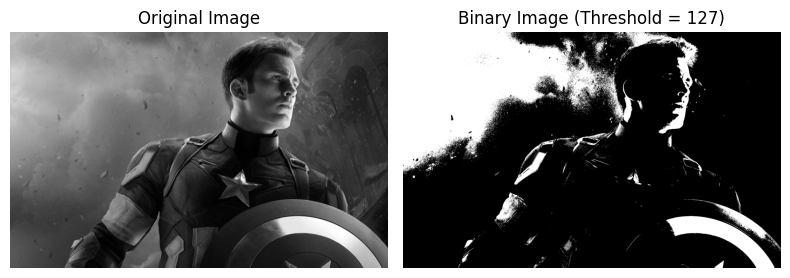

In [ ]:
threshold = 127
binary_image = np.zeros_like(image_gray,dtype=np.uint8)
binary_image[image_gray>threshold] = 255
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_gray, cmap='gray')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title(f"Binary Image (Threshold = {threshold})")
plt.imshow(binary_image, cmap='gray')
plt.axis("off")
plt.tight_layout()
plt.show()

### Negative Image Transformation

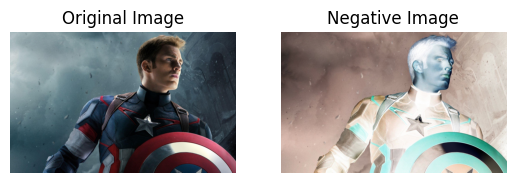

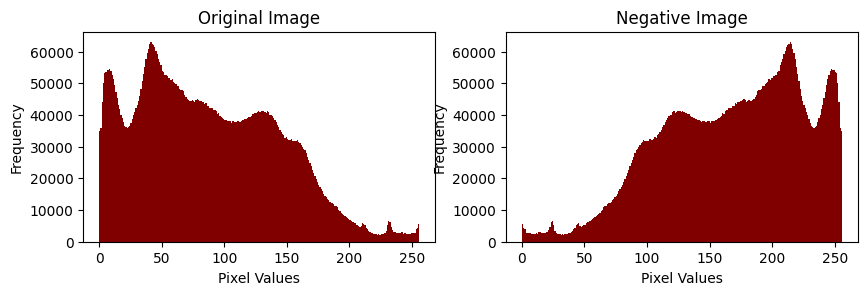

In [ ]:
image_negative = 255 - image_rgb

plt.subplot(1,2,1)
plt.imshow(image_rgb,cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.subplot(1,2,2)
plt.axis('off')
plt.title("Negative Image")
plt.imshow(image_negative,cmap='gray')
plt.show()

plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
plt.hist(image_rgb.ravel(),bins=256,range=(0,256),color='maroon')
plt.title("Original Image")
plt.xlabel("Pixel Values")
plt.ylabel("Frequency")
plt.subplot(2,2,2)
plt.hist(image_negative.ravel(),bins=256,range=(0,256),color='maroon')
plt.title("Negative Image")
plt.xlabel("Pixel Values")
plt.ylabel("Frequency")
plt.show()